# Knowledge-exploration
## Participants based analysis

In [4]:
import pandas as pd
import numpy as np
from ast import literal_eval
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from umap import UMAP

## Call the embeddings

In [5]:
pwd

'/Users/gytkd/Desktop/Backup-Thesis/scripts/mpib/finalized-modeling'

In [6]:
# question 1 embedding from distilbert model
emb_1 = pd.read_json('/Users/gytkd/Desktop/Backup-Thesis/embeddings/knowledge_distilbert_answer1.jsonl', orient='index')
emb_1 = emb_1[['participant_id', 'embedding1']].rename(columns = {'participant_id': 'index', 'embedding1': 'q1'})

In [7]:
# question 2 embedding from distilbert model
emb_2 = pd.read_json('/Users/gytkd/Desktop/Backup-Thesis/embeddings/knowledge_distilbert_answer2.jsonl', orient='index')
emb_2 = emb_2[['participant_id', 'embedding2']].rename(columns = {'participant_id': 'index', 'embedding2': 'q2'})

In [8]:
# question 3 embedding from distilbert model
emb_3 = pd.read_json('/Users/gytkd/Desktop/Backup-Thesis/embeddings/knowledge_distilbert_answer3.jsonl', orient='index')
emb_3 = emb_3[['participant_id', 'embedding3']].rename(columns = {'participant_id': 'index', 'embedding3': 'q3'})

In [9]:
# question 4 embedding from distilbert model
emb_4 = pd.read_json('/Users/gytkd/Desktop/Backup-Thesis/embeddings/knowledge_distilbert_answer4.jsonl', orient='index')
emb_4 = emb_4[['participant_id', 'embedding4']].rename(columns = {'participant_id': 'index', 'embedding4': 'q4'})

In [10]:
# question 5 embedding from distilbert model
emb_5 = pd.read_json('/Users/gytkd/Desktop/Backup-Thesis/embeddings/knowledge_distilbert_answer5.jsonl', orient='index')
emb_5 = emb_5[['participant_id', 'embedding5']].rename(columns = {'participant_id': 'index', 'embedding5': 'q5'})

## Aggregate within the dataframe first and then join together

In [11]:
emb_1.head(5)

,index,q1
0,00278,"[-0.1912737638, -0.1773329824, -0.2605425715, ..."
1,00278,"[-0.0679296777, -0.13514108960000001, -0.13267..."
2,00278,"[-0.1031195149, -0.2114465237, -0.3880674839, ..."
3,00278,"[-0.2258333266, -0.0020551765, -0.049876611700..."
4,00278,"[-0.12228399520000001, 0.0300362222, -0.148336..."


In [12]:
# Group by 'index' and calculate the sum of 'q1_emb'
emb_1 = emb_1.groupby('index')['q1'].apply(lambda x: np.sum(np.stack(x), axis=0))
emb_1 = pd.DataFrame(emb_1, columns= ['q1'])
emb_1['index'] = emb_1.index
emb_1 = emb_1.reset_index(drop = True)

In [13]:
emb_1

,q1,index
0,"[-0.7104402782, -0.4959395499999999, -0.979493...",00278
1,"[-0.3586821751, -0.15381824970000002, -0.82275...",0068d
2,"[-0.8142896731, -0.8274497016000002, -0.467351...",00f13
3,"[-1.1899076254, -0.35361887050000007, -0.62465...",01cb6
4,"[-0.5799569711, -0.7829514518999999, -0.642515...",02670
...,...,...
293,"[-0.8872908205, -0.5147986337, -0.3124759718, ...",f92a4
294,"[-1.0343732499, 0.08551241459999999, -0.777054...",f9fd8
295,"[-0.9605374336, -0.5323074348, -0.226703439899...",fb2a2
296,"[-0.7214982268000001, -0.3550048601, -0.726685...",fb9c4


In [14]:
# Group by 'index' and calculate the sum of 'q2_emb'
emb_2 = emb_2.groupby('index')['q2'].apply(lambda x: np.sum(np.stack(x), axis=0))
emb_2 = pd.DataFrame(emb_2, columns= ['q2'])
emb_2['index'] = emb_2.index
emb_2 = emb_2.reset_index(drop = True)

In [15]:
# Group by 'index' and calculate the sum of 'q3_emb'
emb_3 = emb_3.groupby('index')['q3'].apply(lambda x: np.sum(np.stack(x), axis=0))
emb_3 = pd.DataFrame(emb_3, columns= ['q3'])
emb_3['index'] = emb_3.index
emb_3 = emb_3.reset_index(drop = True)

In [16]:
# Group by 'index' and calculate the sum of 'q4_emb'
emb_4 = emb_4.groupby('index')['q4'].apply(lambda x: np.sum(np.stack(x), axis=0))
emb_4 = pd.DataFrame(emb_4, columns= ['q4'])
emb_4['index'] = emb_4.index
emb_4 = emb_4.reset_index(drop = True)

In [17]:
# Group by 'index' and calculate the sum of 'q5_emb'
emb_5 = emb_5.groupby('index')['q5'].apply(lambda x: np.sum(np.stack(x), axis=0))
emb_5 = pd.DataFrame(emb_5, columns= ['q5'])
emb_5['index'] = emb_5.index
emb_5 = emb_5.reset_index(drop = True)

In [18]:
# # check manually if the above code works.

# temp = df_1_whole[['PARTICIPANT_ID', 'emb_ideas']]
# print(temp[temp['PARTICIPANT_ID']== '00278']['emb_ideas'].to_list())
# instance = temp[temp['PARTICIPANT_ID']== '00278']['emb_ideas']

# sum = 0 
# for i in range(5): 
#     sum += instance[0][i][0]
# sum/5 # This should match with the first element of the emb_1['q1'][0]

## Demographic data calling

In [19]:
# call the original data again
df = pd.read_csv('/Users/gytkd/Desktop/Backup-Thesis/data/processed_data/reference_dataset_v1.csv')

In [20]:
df.head(3)

,Unnamed: 0,problem_id,participant_id,DAT,CRT2,CURIOSITY_SCORE,AGE,GENDER,EDUCATION,EMPLOYMENT,...,POLITICAL,CLIMATE,COVID,NEWS,MEDIA,RELATION_KNOWLEDGE,RELATION_INTEREST,RELATION_CONCERN,ideas,emb_ideas
0,0,Q1,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,2,4,4,"['vaccination schemes in these areas', 'increa...","[[-0.011656875722110271, -0.019422005861997604..."
1,1,Q2,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,5,5,['equal pay for women and men in the same role...,"[[-0.0034376916009932756, 0.006209875456988811..."
2,2,Q3,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,5,5,"['look into conservation plans ', 'ensure poac...","[[0.03516001999378204, -0.004544570576399565, ..."


In [21]:
df = df.rename(columns = {'participant_id': 'PARTICIPANT_ID'})
df = df.set_index('PARTICIPANT_ID')

In [22]:
demos = df[['AGE', 'GENDER', 'EDUCATION', 'EMPLOYMENT', 'INCOME', 'POLITICAL', 'DAT', 'CRT2']]

In [23]:
# Check for duplicate indices
duplicates = demos.index.duplicated()

# keep only the first occurrence of each participant_id (remove duplicates)
demos.drop_duplicates(keep='first', inplace=True)

# Display the modified DataFrame
print("\nDataFrame with unique participant_id:")
print(demos)


DataFrame with unique participant_id:
                AGE  GENDER  EDUCATION  EMPLOYMENT  INCOME  POLITICAL  \
PARTICIPANT_ID                                                          
00278            24       1          5           1       3          2   
0068d            74       1          2           7       2          4   
00f13            43       1          4           1       3          3   
01cb6            56       3          2           8       1          1   
02670            25       1          5           1       2          2   
...             ...     ...        ...         ...     ...        ...   
f92a4            35       1          5           1       3          3   
f9fd8            50       1          4           8       2          2   
fb2a2            38       1          2           8       1          3   
fb9c4            21       1          4           8       3          2   
ff2bf            67       1          2           7       2          4   

           

/var/folders/j0/9xtsbl9502ng_j6cfbbp6fq00000gn/T/ipykernel_14628/256376826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demos.drop_duplicates(keep='first', inplace=True)


In [24]:
demos['index'] = demos.index

/var/folders/j0/9xtsbl9502ng_j6cfbbp6fq00000gn/T/ipykernel_14628/2801886630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demos['index'] = demos.index


## Analysis within question

### Question 2
"How could we improve gender equality at work?"

In [25]:
# convert list to numpy array to make an input to embeddings
emb_2['q2'] = emb_2['q2'].apply(np.array)  
matrix = np.vstack(emb_2['q2'].values)
matrix.shape

(298, 768)

In [26]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [27]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [28]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

/Users/gytkd/Desktop/Backup-Thesis/myenv/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [29]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [30]:
optimal_num_clusters

2

In [31]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

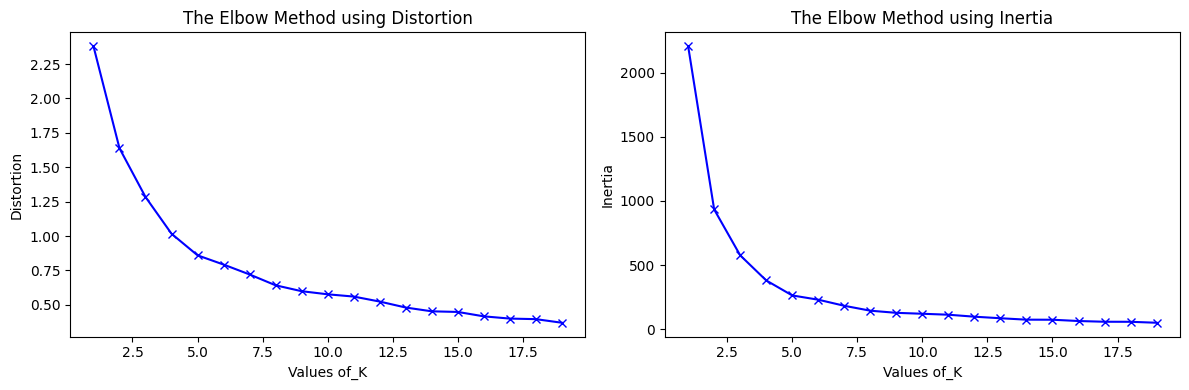

In [32]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [33]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=3, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_2['label'] = final_cluster_labels  

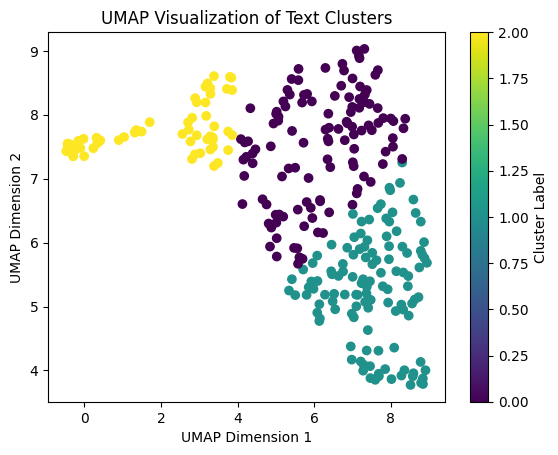

In [34]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [35]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 2\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 2"

Silhouette Coefficient: 0.4218498468399048
Calinski-Harabasz Index: 417.70125055651965
Davies-Bouldin Index: 0.8589427991881108


### connect it with the demographics

In [36]:
result_2 = pd.merge(emb_2, demos, on = 'index')

In [37]:
result_2

,q2,index,label,AGE,GENDER,EDUCATION,EMPLOYMENT,INCOME,POLITICAL,DAT,CRT2
0,"[-1.2141312807, -0.3966640457, -1.041425444200...",00278,0,24,1,5,1,3,2,74.104969,3
1,"[-0.5131815745, 0.03307634779999999, -1.231779...",0068d,1,74,1,2,7,2,4,79.882640,2
2,"[-1.3075574189, -0.6642389744000001, -0.764599...",00f13,1,43,1,4,1,3,3,77.948290,3
3,"[-0.8068943293999999, -0.212616943, -0.5477841...",01cb6,0,56,3,2,8,1,1,78.969095,2
4,"[-0.6015553623000001, -0.6008553245, -1.315350...",02670,1,25,1,5,1,2,2,83.311323,1
...,...,...,...,...,...,...,...,...,...,...,...
293,"[-1.1544252187000001, -0.18673033649999998, -0...",f92a4,0,35,1,5,1,3,3,65.242337,2
294,"[-0.521263361, -0.26593752940000004, -0.844210...",f9fd8,2,50,1,4,8,2,2,80.076401,1
295,"[-0.23314341900000002, -0.2036617603, -0.34013...",fb2a2,2,38,1,2,8,1,3,78.420482,0
296,"[-1.1611104236, -0.3523380244, -1.2341921628, ...",fb9c4,1,21,1,4,8,3,2,83.133171,1


### community assignment

In [116]:
# community 0
com_0 = result_2[result_2['label'] == 0]
len(com_0)

# community 1
com_1 = result_2[result_2['label'] == 1]
len(com_1)

# community 2
com_2 = result_2[result_2['label'] == 2]
len(com_2)

60

In [117]:
communities = [com_0, com_1, com_2]

### feature exploration

In [118]:
age = result_2['AGE']

In [119]:
# delete the null valued rows in the column 'age'
age = age.dropna()

In [120]:
# mean, var, std
print("mean of age:", np.mean(age))
print("variance of age:", np.var(age))
print("standard deviation of age:", np.std(age))

mean of age: 45.82214765100671
variance of age: 245.35427458222605
standard deviation of age: 15.663788640754383


In [121]:
# Dataframe age with each communities

age_0 = communities[0]['AGE']
age_1 = communities[1]['AGE']
age_2 = communities[2]['AGE']

# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in age")
print("how many:", len(age_0))
print("mean:", np.mean(age_0))
print("variance:", np.var(age_0))
print("std:", np.std(age_0))

# community_1
print("\n*community_1 in age ")
print("how many:", len(age_1))
print("mean:", np.mean(age_1))
print("variance:", np.var(age_1))
print("std:", np.std(age_1))

# community_2
print("\n*community_2 in age ")
print("how many:", len(age_2))
print("mean:", np.mean(age_2))
print("variance:", np.var(age_2))
print("std:", np.std(age_2))

*community_0 in age
how many: 119
mean: 45.924369747899156
variance: 237.51528846832852
std: 15.411531022851964

*community_1 in age 
how many: 119
mean: 45.52100840336134
variance: 236.92182755455121
std: 15.392265185948142

*community_2 in age 
how many: 60
mean: 46.21666666666667
variance: 277.26972222222224
std: 16.651418024367242


## Hypothesis testing

In [122]:
data = result_2

In [123]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

## ANOVA

### Age

In [124]:
from scipy.stats import levene, f_oneway
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.oneway import anova_oneway

In [125]:
# split the dataset for the analysis

grouped_data = [data['AGE'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test + ANOVA

In [126]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in age across clusters (p < 0.05).")
    else:
        print("There is no significant difference in age across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 0.3894119260597699
P-Value: 0.6778028672933347
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 0.04313089954388875
P-Value: 0.9577920467644305
There is no significant difference in age across clusters (p > 0.05).


### DAT

In [127]:
# split the dataset for the analysis

grouped_data = [data['DAT'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [73]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in dat across clusters (p < 0.05).")
    else:
        print("There is no significant difference in dat across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 1.8295197645476562
P-Value: 0.16230686995462987
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 4.6647662295199535
P-Value: 0.010127279218871873
There is a significant difference in dat across clusters (p < 0.05).


### CRT

In [74]:
# split the dataset for the analysis

grouped_data = [data['CRT2'][data['label'] == cluster] for cluster in data['label'].unique()]

### Levene's Test

In [75]:
# Perform Levene's test
levene_stat, levene_p = levene(*grouped_data)

print(f"Levene's Test Statistic: {levene_stat}")
print(f"P-Value: {levene_p}")

# Check the result of Levene's test
if levene_p > 0.05:
    print("Variances are equal across groups (p > 0.05), you can proceed with ANOVA.\n")
    
    # Perform ANOVA
    anova_stat, anova_p = f_oneway(*grouped_data)
    
    print(f"ANOVA Test Statistic: {anova_stat}")
    print(f"P-Value: {anova_p}")
    
    if anova_p < 0.05:
        print("There is a significant difference in crt across clusters (p < 0.05).")
    else:
        print("There is no significant difference in crt across clusters (p > 0.05).")
else:
    print("Variances are not equal across groups (p <= 0.05), consider using a different test like Welch's ANOVA.")

Levene's Test Statistic: 2.5424393789010287
P-Value: 0.08039718586487628
Variances are equal across groups (p > 0.05), you can proceed with ANOVA.

ANOVA Test Statistic: 3.8351433722341532
P-Value: 0.0226831621697218
There is a significant difference in crt across clusters (p < 0.05).


## Chi-Square Test
### Check the expected frequency
* It is supposed to be, Every cell > 0, 80% of the cells >= 5

In [76]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

### Gender

In [77]:
# Create a contingency table
contingency_table = pd.crosstab(data['GENDER'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    3.5979
Degrees of Freedom:       6
p-value:                  7.3091e-01

Expected Frequencies (rounded):
label      0     1      2
GENDER                   
1       60.3  60.3  30.40
2        0.4   0.4   0.20
3       57.9  57.9  29.19
5        0.4   0.4   0.20


### Cut off the dataset

In [78]:
contingency_table_filtered = contingency_table.loc[[1, 3]]

In [79]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[60.19594595 60.19594595 30.60810811]
 [57.80405405 57.80405405 29.39189189]]
All expected frequencies are >= 5. The Chi-Square test can be used.


In [80]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    0.5860
Degrees of Freedom:       2
p-value:                  7.4604e-01

Expected Frequencies (rounded):
label      0     1      2
GENDER                   
1       60.2  60.2  30.61
3       57.8  57.8  29.39


**Result:** p value is not below 0.05, therefore there is no significant difference in age by clusters.

### Income

In [81]:
# Create a contingency table
contingency_table = pd.crosstab(data['INCOME'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    8.8773
Degrees of Freedom:       8
p-value:                  3.5275e-01

Expected Frequencies (rounded):
label       0      1      2
INCOME                     
1       29.55  29.55  14.90
2       45.52  45.52  22.95
3       23.56  23.56  11.88
4       15.97  15.97   8.05
5        4.39   4.39   2.21


**RESULT:** Expected frequency meets the assumptions, so it is valid analysis

* Income shows NO significant difference between the clusters

### Employment -> expected frequency was not good, could not finish.

In [82]:
# Create a contingency table
contingency_table = pd.crosstab(data['EMPLOYMENT'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    17.5059
Degrees of Freedom:       14
p-value:                  2.3022e-01

Expected Frequencies (rounded):
label           0      1      2
EMPLOYMENT                     
1           43.93  43.93  22.15
2           16.37  16.37   8.26
3            5.19   5.19   2.62
4           17.17  17.17   8.66
5            6.39   6.39   3.22
6            7.19   7.19   3.62
7           16.77  16.77   8.46
8            5.99   5.99   3.02


* Assumption is bit met, but not so valid for the Chi-Square.

### Education

In [83]:
# Create a contingency table
contingency_table = pd.crosstab(data['EDUCATION'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    21.4855
Degrees of Freedom:       8
p-value:                  5.9636e-03

Expected Frequencies (rounded):
label          0      1      2
EDUCATION                     
2          31.15  31.15  15.70
3          21.56  21.56  10.87
4          43.13  43.13  21.74
5          22.36  22.36  11.28
6           0.80   0.80   0.40


In [84]:
# filter only the 1,2 voted participants
contingency_table_filtered = contingency_table.loc[[2, 3, 4, 5]]

In [85]:
contingency_table_filtered

label,0,1,2
EDUCATION,,,
2,42,16,20
3,24,21,9
4,33,54,21
5,20,27,9


In [86]:
# Perform Chi-Square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results
print("Expected Frequencies:")
print(expected)

# Check if all expected frequencies are >= 5
if np.all(expected >= 5):
    print("All expected frequencies are >= 5. The Chi-Square test can be used.")
else:
    print("Some expected frequencies are < 5. Check if the cells <5 are more than 20% of the entire cells. Then consider using Fisher's Exact Test or combining categories.")

Expected Frequencies:
[[31.35810811 31.09459459 15.5472973 ]
 [21.70945946 21.52702703 10.76351351]
 [43.41891892 43.05405405 21.52702703]
 [22.51351351 22.32432432 11.16216216]]
All expected frequencies are >= 5. The Chi-Square test can be used.


* Assumption is met regarding the expected frequency

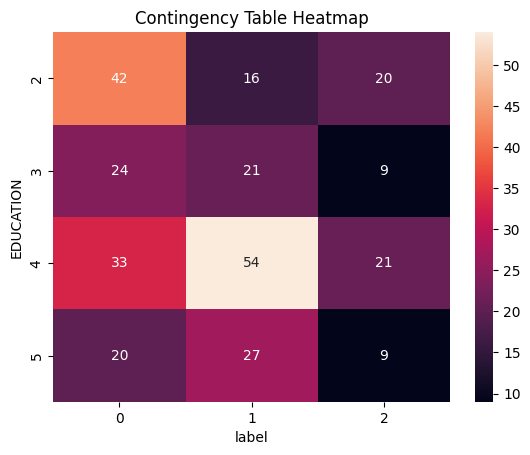

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the contingency table
sns.heatmap(contingency_table_filtered, annot=True, fmt='d')
plt.title("Contingency Table Heatmap")
plt.show()

### Chi-Square test

In [88]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_filtered)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    19.7324
Degrees of Freedom:       6
p-value:                  3.0899e-03

Expected Frequencies (rounded):
label          0      1      2
EDUCATION                     
2          31.36  31.09  15.55
3          21.71  21.53  10.76
4          43.42  43.05  21.53
5          22.51  22.32  11.16


### Influence of a label on the overall chi-square test: residuals calculations

In [89]:
# Calculate the residuals
residuals = contingency_table_filtered - expected

# Standardize the residuals
standardized_residuals = residuals / np.sqrt(expected)

# Convert to DataFrame for better readability
standardized_residuals_df = pd.DataFrame(standardized_residuals,
                                         index=contingency_table_filtered.index,
                                         columns=contingency_table_filtered.columns)

# Print results
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table_filtered.index, 
                   columns=contingency_table_filtered.columns).round(2))
print("\nStandardized Residuals:")
print(standardized_residuals_df.round(2))

# Optional: if you want to see which residuals are extreme
print("\nExtreme Standardized Residuals (|value| > 2):")
print(standardized_residuals_df[standardized_residuals_df.abs() > 2].dropna(how='all'))


        Chi-Squared Test Results        
Test Statistic (Chi2):    19.7324
Degrees of Freedom:       6
p-value:                  3.0899e-03

Expected Frequencies (rounded):
label          0      1      2
EDUCATION                     
2          31.36  31.09  15.55
3          21.71  21.53  10.76
4          43.42  43.05  21.53
5          22.51  22.32  11.16

Standardized Residuals:
label         0     1     2
EDUCATION                  
2          1.90 -2.71  1.13
3          0.49 -0.11 -0.54
4         -1.58  1.67 -0.11
5         -0.53  0.99 -0.65

Extreme Standardized Residuals (|value| > 2):
label       0         1   2
EDUCATION                  
2         NaN -2.706942 NaN


**Result:**
* Assumption: expected frequency is met
* p is below 0.05 -> reject the null-hypothesis
* The distribution of the feature(**education**) **is significantly different** across different clusters. 
* Looking at the Residuals, Community 0 is overrerpesented for label 2. And Community 1 is underrepresented for the label 2. Two Communities show the opposite distributions in terms of the education. 

### Pairwise Comparison with residuals interpretation

In [90]:
import itertools
from statsmodels.stats.multitest import multipletests

In [91]:
# Get all unique pairs of columns (communities)
pairs = list(itertools.combinations(contingency_table_filtered.columns, 2))

# Store results for pairwise comparisons
pairwise_results = []
pairwise_residuals = {}

In [92]:
# Perform pairwise chi-squared tests
for pair in pairs:
    # Create a contingency table for each pair of communities
    pair_table = contingency_table_filtered.loc[:, pair]
    
    # Perform chi-squared test
    chi2_pair, p_pair, dof_pair, expected = chi2_contingency(pair_table)
    
    # Calculate residuals and standardized residuals
    residuals = pair_table - expected
    standardized_residuals = residuals / np.sqrt(expected)
    
    # Append results
    pairwise_results.append((pair, chi2_pair, p_pair))
    pairwise_residuals[pair] = standardized_residuals

In [93]:
# Extract p-values for correction
p_values = [result[2] for result in pairwise_results]

In [94]:
# Apply Bonferroni correction
adjusted_p_values = multipletests(p_values, method='bonferroni')[1]

In [95]:
# Print pairwise results with adjusted p-values
print("\nPairwise Chi-Squared Test Results (with Bonferroni correction):")
print("="*65)
print(f"{'Community Pair':<25}{'Chi2':<10}{'p-value':<15}{'Adj. p-value':<15}")
print("-"*65)

for i, (pair, chi2_pair, p_pair) in enumerate(pairwise_results):
    print(f"{str(pair):<25}{chi2_pair:<10.4f}{p_pair:<15.4e}{adjusted_p_values[i]:<15.4e}")


Pairwise Chi-Squared Test Results (with Bonferroni correction):
Community Pair           Chi2      p-value        Adj. p-value   
-----------------------------------------------------------------
(0, 1)                   17.9628   4.4769e-04     1.3431e-03     
(0, 2)                   1.3978    7.0605e-01     1.0000e+00     
(1, 2)                   10.2350   1.6671e-02     5.0012e-02     


* Result: Comparing pairwise, 
    * (0, 1) community: adjusted p-value < 0.05 --- significant difference
    * (0, 2) community: adjusted p-value > 0.05 --- no significant difference
    * (1, 2) community: adjusted p-value > 0.05 --- no significant difference

In [96]:
# Print standardized residuals for each pairwise comparison
print("\nStandardized Residuals for Each Pairwise Comparison:")
for pair, residuals_df in pairwise_residuals.items():
    print(f"\nPair: {pair}")
    print(pd.DataFrame(residuals_df, index=contingency_table_filtered.index, columns=pair).round(2))


Standardized Residuals for Each Pairwise Comparison:

Pair: (0, 1)
              0     1
EDUCATION            
2          2.39 -2.40
3          0.30 -0.30
4         -1.62  1.62
5         -0.74  0.74

Pair: (0, 2)
              0     2
EDUCATION            
2          0.09 -0.12
3          0.41 -0.59
4         -0.52  0.73
5          0.14 -0.20

Pair: (1, 2)
              1     2
EDUCATION            
2         -1.63  2.31
3          0.22 -0.32
4          0.57 -0.80
5          0.61 -0.87


**Interpretation: Residuals**
* Pair (0, 1): Community 0 is overrepresented with label 2, and Community 1 is underrepresented for label 2. 
* Pair (0, 2): The residuals are closer to the 0, meaning the community 0 and 2 distributions are quite similar with minor deviations. 
* Pair (1, 2): Community 2 shows bigger deviations compared to the Community 1, but their distributions are not very different with each other.  

### Political leaning

In [97]:
# Create a contingency table
contingency_table = pd.crosstab(data['POLITICAL'], data['label'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    7.5668
Degrees of Freedom:       8
p-value:                  4.7688e-01

Expected Frequencies (rounded):
label          0      1      2
POLITICAL                     
1          13.18  13.18   6.64
2          39.93  39.93  20.13
3          47.12  47.12  23.76
4          15.17  15.17   7.65
5           3.59   3.59   1.81


* The assumptions about the expected frequency is met. 

In [98]:
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results in a readable format
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))

        Chi-Squared Test Results        
Test Statistic (Chi2):    7.5668
Degrees of Freedom:       8
p-value:                  4.7688e-01

Expected Frequencies (rounded):
label          0      1      2
POLITICAL                     
1          13.18  13.18   6.64
2          39.93  39.93  20.13
3          47.12  47.12  23.76
4          15.17  15.17   7.65
5           3.59   3.59   1.81


**Result**: The political leaning shows no significant difference between clusters.

### Influence of a label on the overall chi-square test: residuals calculations

In [99]:
# Calculate the residuals
residuals = contingency_table - expected

# Standardize the residuals
standardized_residuals = residuals / np.sqrt(expected)

# Convert to DataFrame for better readability
standardized_residuals_df = pd.DataFrame(standardized_residuals,
                                         index=contingency_table.index,
                                         columns=contingency_table.columns)

# Print results
print(f"{'Chi-Squared Test Results':^40}")
print("="*40)
print(f"{'Test Statistic (Chi2):':<25} {chi2:.4f}")
print(f"{'Degrees of Freedom:':<25} {dof}")
print(f"{'p-value:':<25} {p:.4e}")
print("\nExpected Frequencies (rounded):")
print(pd.DataFrame(expected, 
                   index=contingency_table.index, 
                   columns=contingency_table.columns).round(2))
print("\nStandardized Residuals:")
print(standardized_residuals_df.round(2))

# Optional: if you want to see which residuals are extreme
print("\nExtreme Standardized Residuals (|value| > 2):")
print(standardized_residuals_df[standardized_residuals_df.abs() > 2].dropna(how='all'))


        Chi-Squared Test Results        
Test Statistic (Chi2):    7.5668
Degrees of Freedom:       8
p-value:                  4.7688e-01

Expected Frequencies (rounded):
label          0      1      2
POLITICAL                     
1          13.18  13.18   6.64
2          39.93  39.93  20.13
3          47.12  47.12  23.76
4          15.17  15.17   7.65
5           3.59   3.59   1.81

Standardized Residuals:
label         0     1     2
POLITICAL                  
1         -0.32  1.05 -1.03
2         -0.78  0.96 -0.25
3          0.42 -0.89  0.67
4          0.98 -1.07  0.13
5         -0.31  0.21  0.14

Extreme Standardized Residuals (|value| > 2):
Empty DataFrame
Columns: [0, 1, 2]
Index: []


**Result**:
* There is no extreme values of residuals found. 

# Demographic visualization

### Age

In [128]:
age = demos['AGE']

In [129]:
# delete the null valued rows in the column 'age'
age = age.dropna()

In [130]:
# mean, var, std
print("mean of age:", np.mean(age))
print("variance of age:", np.var(age))
print("standard deviation of age:", np.std(age))

mean of age: 45.86666666666667
variance of age: 244.02888888888884
standard deviation of age: 15.621424035243678


In [131]:
# Dataframe age with each communities
age_0 = communities[0]['AGE']
age_1 = communities[1]['AGE']
age_2 = communities[2]['AGE']

# print cardinality, mean, var, std within the cluster.
# community_0
print("*community_0 in age")
print("how many:", len(age_0))
print("mean:", np.mean(age_0))
print("variance:", np.var(age_0))
print("std:", np.std(age_0))

# community_1
print("\n*community_1 in age ")
print("how many:", len(age_1))
print("mean:", np.mean(age_1))
print("variance:", np.var(age_1))
print("std:", np.std(age_1))

# community_2
print("\n*community_2 in age ")
print("how many:", len(age_2))
print("mean:", np.mean(age_2))
print("variance:", np.var(age_2))
print("std:", np.std(age_2))


*community_0 in age
how many: 119
mean: 45.924369747899156
variance: 237.51528846832852
std: 15.411531022851964

*community_1 in age 
how many: 119
mean: 45.52100840336134
variance: 236.92182755455121
std: 15.392265185948142

*community_2 in age 
how many: 60
mean: 46.21666666666667
variance: 277.26972222222224
std: 16.651418024367242


(array([4., 2., 5., 4., 2., 6., 9., 3., 3., 7., 7., 4., 3., 1., 5., 3., 3.,
        6., 5., 4., 4., 4., 9., 5., 6., 1., 1., 2., 0., 1.]),
 array([19.        , 20.96666667, 22.93333333, 24.9       , 26.86666667,
        28.83333333, 30.8       , 32.76666667, 34.73333333, 36.7       ,
        38.66666667, 40.63333333, 42.6       , 44.56666667, 46.53333333,
        48.5       , 50.46666667, 52.43333333, 54.4       , 56.36666667,
        58.33333333, 60.3       , 62.26666667, 64.23333333, 66.2       ,
        68.16666667, 70.13333333, 72.1       , 74.06666667, 76.03333333,
        78.        ]),
 <BarContainer object of 30 artists>)

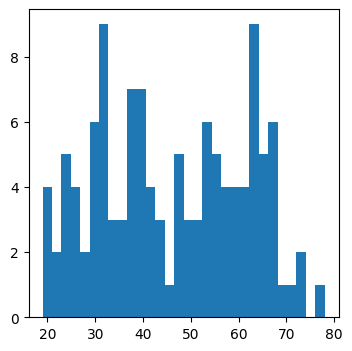

In [132]:
# it is the example below, use to see another community as well.
# Histogram of age in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(age_0, bins = 30)

### Gender

In [133]:
gender = demos['GENDER']
gender = gender.dropna()
gender

PARTICIPANT_ID
00278    1
0068d    1
00f13    1
01cb6    3
02670    1
        ..
f92a4    1
f9fd8    1
fb2a2    1
fb9c4    1
ff2bf    1
Name: GENDER, Length: 300, dtype: int64

In [134]:
# Dataframe gender with each communities
gender_0 = communities[0]['GENDER']
gender_1 = communities[1]['GENDER']
gender_2 = communities[2]['GENDER']

print("How many in gender belong to community 0:", len(gender_0))
print("How many in gender belong to community 1:", len(gender_1))
print("How many in gender belong to community 2:", len(gender_2))

How many in gender belong to community 0: 119
How many in gender belong to community 1: 119
How many in gender belong to community 2: 60


(array([57.,  0.,  0.,  0.,  1.,  0.,  0., 61.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 <BarContainer object of 8 artists>)

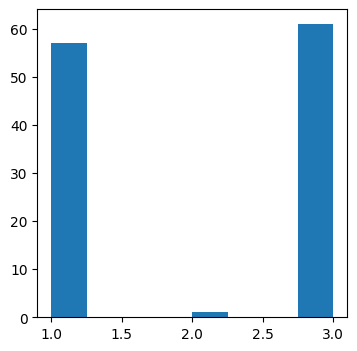

In [135]:
# it is the example below, use to see another community as well.
# Histogram of gender in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(gender_0, bins = 8)

(array([62.,  0.,  0.,  0., 56.,  0.,  0.,  1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

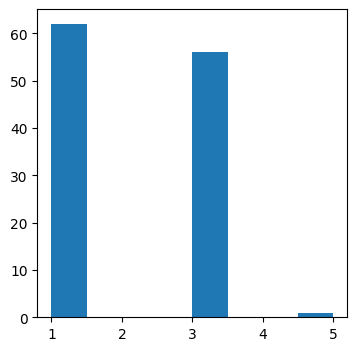

In [136]:
# it is the example below, use to see another community as well.
# Histogram of gender in community 1
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(gender_1, bins = 8)

(array([32.,  0.,  0.,  0.,  0.,  0.,  0., 28.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 <BarContainer object of 8 artists>)

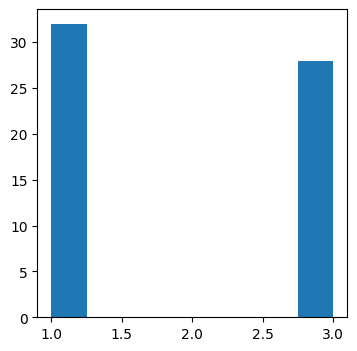

In [137]:
# it is the example below, use to see another community as well.
# Histogram of gender in community 2
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(gender_2, bins = 8)

### Ideology political

In [138]:
politics = demos['POLITICAL']
politics = politics.dropna()
politics

PARTICIPANT_ID
00278    2
0068d    4
00f13    3
01cb6    1
02670    2
        ..
f92a4    3
f9fd8    2
fb2a2    3
fb9c4    2
ff2bf    4
Name: POLITICAL, Length: 300, dtype: int64

In [141]:
# Dataframe political ideology with each communities
politics_0 = communities[0]['POLITICAL']
politics_1 = communities[1]['POLITICAL']
politics_2 = communities[2]['POLITICAL']

print("How many in politics belong to community 0:", len(politics_0))
print("How many in politics belong to community 1:", len(politics_1))
print("How many in politics belong to community 2:", len(politics_2))

How many in politics belong to community 0: 119
How many in politics belong to community 1: 119
How many in politics belong to community 2: 60


(array([12.,  0., 35.,  0., 50.,  0., 19.,  3.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

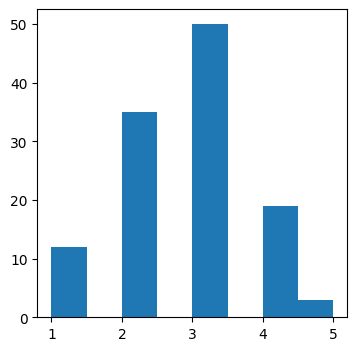

In [142]:
# it is the example below, use to see another community as well.
# Histogram of politics in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(politics_0, bins = 8)

(array([17.,  0., 46.,  0., 41.,  0., 11.,  4.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

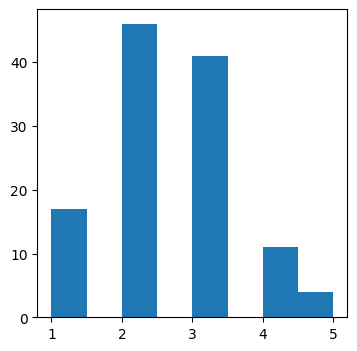

In [143]:
# it is the example below, use to see another community as well.
# Histogram of politics in community 1
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(politics_1, bins = 8)

(array([ 4.,  0., 19.,  0., 27.,  0.,  8.,  2.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

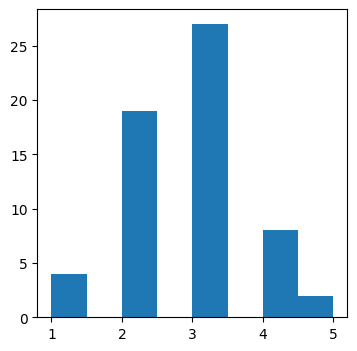

In [144]:
# it is the example below, use to see another community as well.
# Histogram of politics in community 2
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(politics_2, bins = 8)

### Education 

In [145]:
demos.columns.tolist()

['AGE',
 'GENDER',
 'EDUCATION',
 'EMPLOYMENT',
 'INCOME',
 'POLITICAL',
 'DAT',
 'CRT2',
 'index']

In [146]:
education = demos['EDUCATION']

In [147]:
education = education.dropna()
education

PARTICIPANT_ID
00278    5
0068d    2
00f13    4
01cb6    2
02670    5
        ..
f92a4    5
f9fd8    4
fb2a2    2
fb9c4    4
ff2bf    2
Name: EDUCATION, Length: 300, dtype: int64

In [148]:
# Dataframe political ideology with each communities
education_0 = communities[0]['EDUCATION']
education_1 = communities[1]['EDUCATION']
education_2 = communities[2]['EDUCATION']

print("How many in education belong to community 0:", len(education_0))
print("How many in education belong to community 1:", len(education_1))
print("How many in education belong to community 2:", len(education_2))


How many in education belong to community 0: 119
How many in education belong to community 1: 119
How many in education belong to community 2: 60


(array([42.,  0., 24.,  0.,  0., 33.,  0., 20.]),
 array([2.   , 2.375, 2.75 , 3.125, 3.5  , 3.875, 4.25 , 4.625, 5.   ]),
 <BarContainer object of 8 artists>)

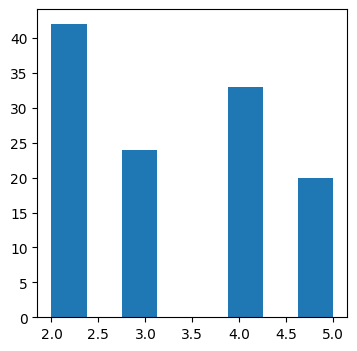

In [149]:
# it is the example below, use to see another community as well.
# Histogram of education in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(education_0, bins = 8)

### Employment

In [152]:
demos['EMPLOYMENT']

PARTICIPANT_ID
00278    1
0068d    7
00f13    1
01cb6    8
02670    1
        ..
f92a4    1
f9fd8    8
fb2a2    8
fb9c4    8
ff2bf    7
Name: EMPLOYMENT, Length: 300, dtype: int64

In [153]:
employment = demos['EMPLOYMENT'].dropna()
employment

PARTICIPANT_ID
00278    1
0068d    7
00f13    1
01cb6    8
02670    1
        ..
f92a4    1
f9fd8    8
fb2a2    8
fb9c4    8
ff2bf    7
Name: EMPLOYMENT, Length: 300, dtype: int64

In [154]:
# Dataframe political ideology with each communities
employment_0 = communities[0]['EMPLOYMENT']
employment_1 = communities[1]['EMPLOYMENT']
employment_2 = communities[2]['EMPLOYMENT']

print("How many in employment belong to community 0:", len(employment_0))
print("How many in employment belong to community 1:", len(employment_1))
print("How many in employment belong to community 2:", len(employment_2))


How many in employment belong to community 0: 119
How many in employment belong to community 1: 119
How many in employment belong to community 2: 60


(array([40., 15.,  6.,  0., 23.,  6.,  0.,  8., 18.,  3.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

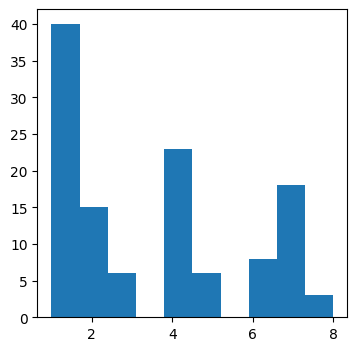

In [155]:
# it is the example below, use to see another community as well.
# Histogram of employment in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(employment_0, bins = 10)

### Income

In [156]:
income = demos['INCOME'].dropna()

In [157]:
# Dataframe political ideology with each communities
income_0 = communities[0]['INCOME']
income_1 = communities[1]['INCOME']
income_2 = communities[2]['INCOME']

print("How many in income belong to community 0:", len(income_0))
print("How many in income belong to community 1:", len(income_1))
print("How many in income belong to community 2:", len(income_2))


How many in income belong to community 0: 119
How many in income belong to community 1: 119
How many in income belong to community 2: 60


(array([35.,  0., 45.,  0., 25.,  0., 11.,  3.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 8 artists>)

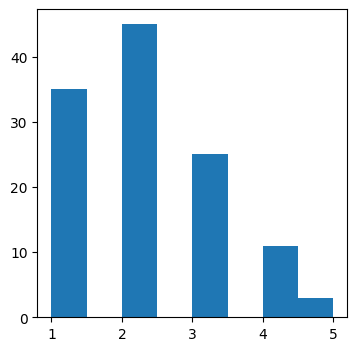

In [158]:
# it is the example below, use to see another community as well.
# Histogram of income in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(income_0, bins = 8)

### DAT - how divergent the participant can think

In [159]:
dat = demos['DAT'].dropna()

In [160]:
dat_0 = communities[0]['DAT']
dat_1 = communities[1]['DAT']
dat_2 = communities[2]['DAT']

print("How many in DAT belong to community 0:", len(dat_0))
print("How many in DAT belong to community 1:", len(dat_1))
print("How many in DAT belong to community 2:", len(dat_2))


How many in DAT belong to community 0: 119
How many in DAT belong to community 1: 119
How many in DAT belong to community 2: 60


(array([ 6.,  7.,  7., 23., 22., 28., 18.,  8.]),
 array([59.17252998, 63.07935933, 66.98618869, 70.89301805, 74.79984741,
        78.70667677, 82.61350613, 86.52033549, 90.42716485]),
 <BarContainer object of 8 artists>)

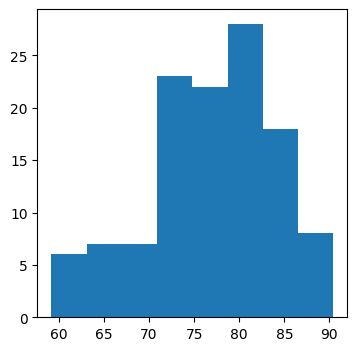

In [161]:
# it is the example below, use to see another community as well.
# Histogram of DAT in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(dat_0, bins = 8)

### CRT - how creative the participant can think

In [162]:
crt = demos['CRT2'].dropna()

In [164]:
crt_0 = communities[0]['CRT2']
crt_1 = communities[1]['CRT2']
crt_2 = communities[2]['CRT2']


print("How many in CRT belong to community 0:", len(crt_0))
print("How many in CRT belong to community 1:", len(crt_1))
print("How many in CRT belong to community 2:", len(crt_2))


How many in CRT belong to community 0: 119
How many in CRT belong to community 1: 119
How many in CRT belong to community 2: 60


(array([ 3.,  0., 18.,  0., 32.,  0., 46., 20.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <BarContainer object of 8 artists>)

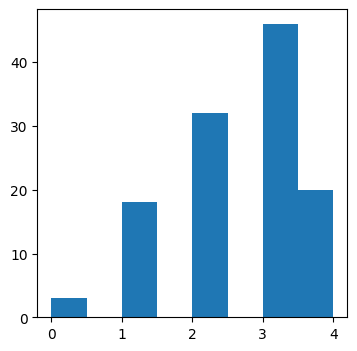

In [165]:
# it is the example below, use to see another community as well.
# Histogram of CRT in community 0
plt.rcParams["figure.figsize"] = (4,4) # set the figure size
plt.hist(crt_0, bins = 8)

## Visualize multiple graph

In [166]:
# Display graphs grouped by the community label
import matplotlib.pyplot as plt

# List of data for each plot
data_0 = [age_0, gender_0, education_0, employment_0, income_0, politics_0, dat_0, crt_0]
data_1 = [age_1, gender_1, education_1, employment_1, income_1, politics_1, dat_1, crt_1]
data_2 = [age_2, gender_2, education_2, employment_2, income_2, politics_2, dat_2, crt_2]

### Community 0



*The number of the community members: 119


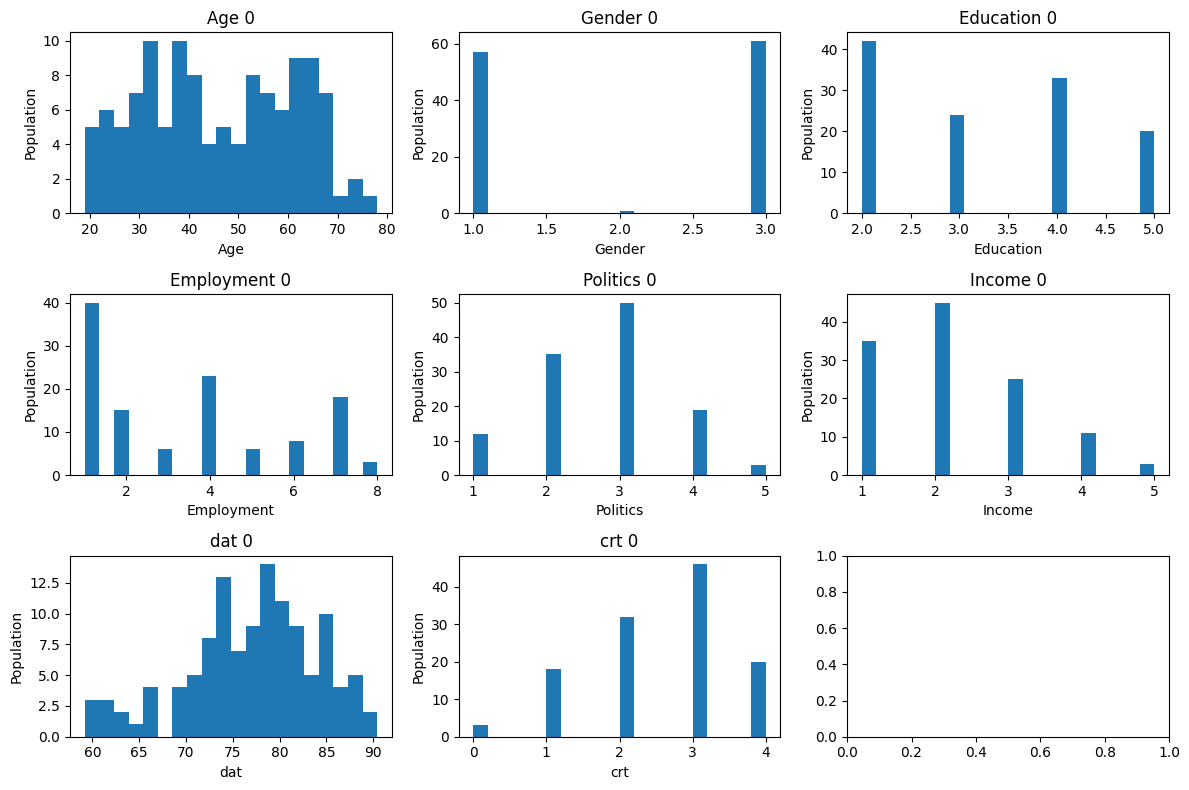

In [167]:
# Create subplots dynamically
fig, axes = plt.subplots(3, 3,  figsize=(12, 8))


# Create a histogram on one of the subplots
axes[0, 0].hist(age_0, bins=20)
axes[0, 0].set_title('Age 0')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 1].hist(gender_0, bins=20)
axes[0, 1].set_title('Gender 0')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 2].hist(education_0, bins=20)
axes[0, 2].set_title('Education 0')
axes[0, 2].set_xlabel('Education')
axes[0, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 0].hist(employment_0, bins=20)
axes[1, 0].set_title('Employment 0')
axes[1, 0].set_xlabel('Employment')
axes[1, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 1].hist(politics_0, bins=20)
axes[1, 1].set_title('Politics 0')
axes[1, 1].set_xlabel('Politics')
axes[1, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 2].hist(income_0, bins=20)
axes[1, 2].set_title('Income 0')
axes[1, 2].set_xlabel('Income')
axes[1, 2].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 0].hist(dat_0, bins=20)
axes[2, 0].set_title('dat 0')
axes[2, 0].set_xlabel('dat')
axes[2, 0].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 1].hist(crt_0, bins=20)
axes[2, 1].set_title('crt 0')
axes[2, 1].set_xlabel('crt')
axes[2, 1].set_ylabel('Population')

# Adjust layout
plt.tight_layout()

# Print the number of the community members:
print("\n\n*The number of the community members:", len(communities[0]))

# Show the combined plots
plt.show()


### community 1



*The number of the community members: 119


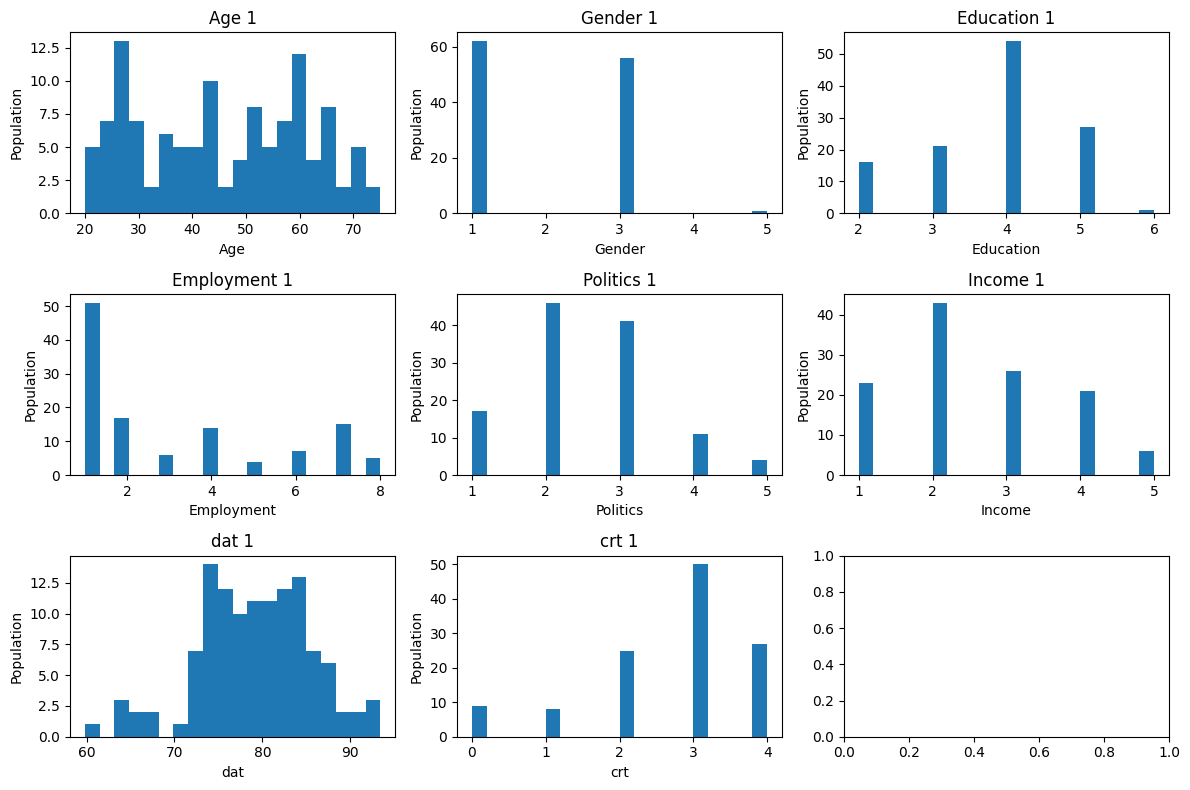

In [168]:
# Create subplots dynamically
fig, axes = plt.subplots(3, 3,  figsize=(12, 8))


# Create a histogram on one of the subplots
axes[0, 0].hist(age_1, bins=20)
axes[0, 0].set_title('Age 1')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 1].hist(gender_1, bins=20)
axes[0, 1].set_title('Gender 1')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 2].hist(education_1, bins=20)
axes[0, 2].set_title('Education 1')
axes[0, 2].set_xlabel('Education')
axes[0, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 0].hist(employment_1, bins=20)
axes[1, 0].set_title('Employment 1')
axes[1, 0].set_xlabel('Employment')
axes[1, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 1].hist(politics_1, bins=20)
axes[1, 1].set_title('Politics 1')
axes[1, 1].set_xlabel('Politics')
axes[1, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 2].hist(income_1, bins=20)
axes[1, 2].set_title('Income 1')
axes[1, 2].set_xlabel('Income')
axes[1, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[2, 0].hist(dat_1, bins=20)
axes[2, 0].set_title('dat 1')
axes[2, 0].set_xlabel('dat')
axes[2, 0].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 1].hist(crt_1, bins=20)
axes[2, 1].set_title('crt 1')
axes[2, 1].set_xlabel('crt')
axes[2, 1].set_ylabel('Population')

# Adjust layout
plt.tight_layout()

# Print the number of the community members:
print("\n\n*The number of the community members:", len(communities[1]))

# Show the combined plots
plt.show()


* dat1: compared to the community 0, it is more evenly distributed. 

### community 2



*The number of the community members: 60


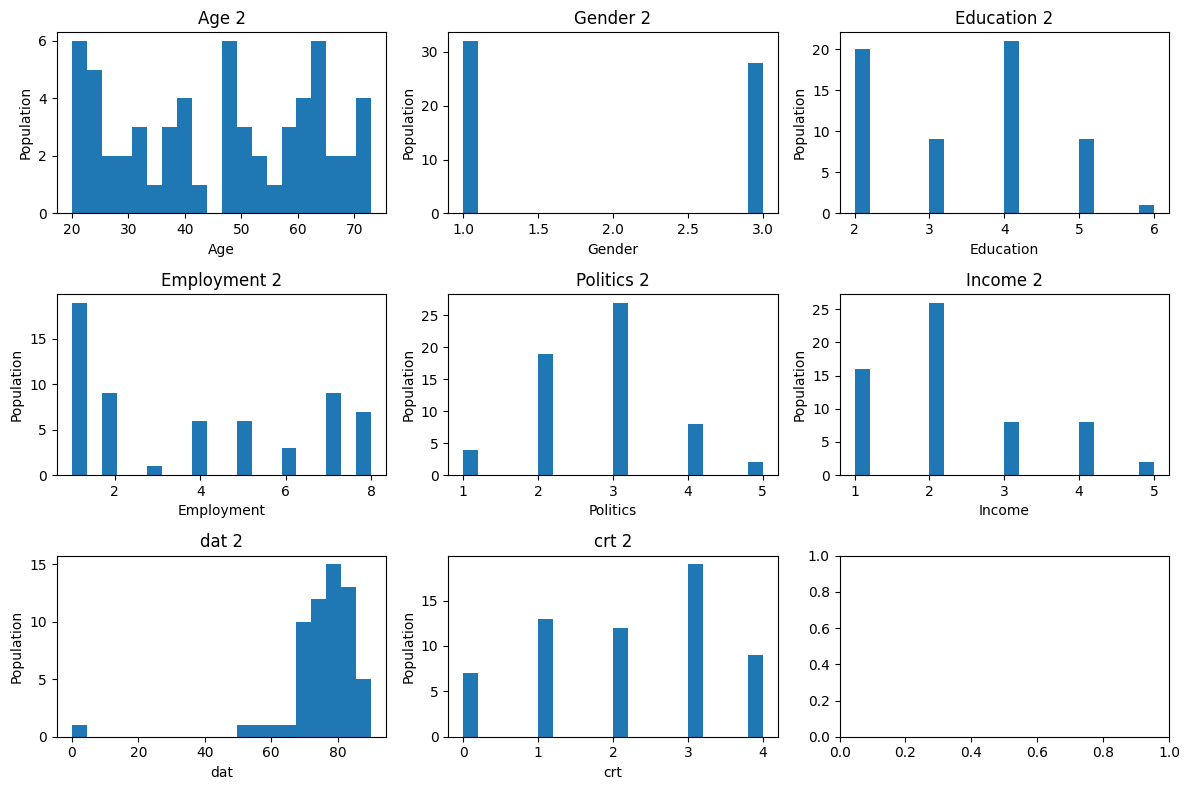

In [169]:
# Create subplots dynamically
fig, axes = plt.subplots(3, 3,  figsize=(12, 8))


# Create a histogram on one of the subplots
axes[0, 0].hist(age_2, bins=20)
axes[0, 0].set_title('Age 2')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 1].hist(gender_2, bins=20)
axes[0, 1].set_title('Gender 2')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[0, 2].hist(education_2, bins=20)
axes[0, 2].set_title('Education 2')
axes[0, 2].set_xlabel('Education')
axes[0, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 0].hist(employment_2, bins=20)
axes[1, 0].set_title('Employment 2')
axes[1, 0].set_xlabel('Employment')
axes[1, 0].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 1].hist(politics_2, bins=20)
axes[1, 1].set_title('Politics 2')
axes[1, 1].set_xlabel('Politics')
axes[1, 1].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[1, 2].hist(income_2, bins=20)
axes[1, 2].set_title('Income 2')
axes[1, 2].set_xlabel('Income')
axes[1, 2].set_ylabel('Population')

# Create a histogram on one of the subplots
axes[2, 0].hist(dat_2, bins=20)
axes[2, 0].set_title('dat 2')
axes[2, 0].set_xlabel('dat')
axes[2, 0].set_ylabel('Population')


# Create a histogram on one of the subplots
axes[2, 1].hist(crt_2, bins=20)
axes[2, 1].set_title('crt 2')
axes[2, 1].set_xlabel('crt')
axes[2, 1].set_ylabel('Population')

# Adjust layout
plt.tight_layout()

# Print the number of the community members:
print("\n\n*The number of the community members:", len(communities[2]))

# Show the combined plots
plt.show()


* **REFsource** : interpreting the clustering results.

https://developers.google.com/machine-learning/clustering/interpret


### Analysis of the ANOVA and Chi-Square test results

1. ANOVA

     1) Table of metrics - mean, var, std, cardinality, p-value:
        https://docs.google.com/spreadsheets/d/1E4k_kSAiAspQuXAbEuYquVKFuzHa5Ihz7mNryUj1jOU/edit#gid=446196028 -> update

     2) **DAT, CRT** shows the difference in means across the clusters

2. Chi-Square

: Except for the **EDUCATION**, There was no significant difference across the clusters with the distribution of the categorical features.